<a href="https://colab.research.google.com/github/heleownae/KPI_Idea/blob/main/KPII_%EC%B6%A9%EC%84%B1%EA%B3%A0%EA%B0%9D_LSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
# 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/customers.csv')
locations = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/locations.csv')
order_items = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/order_items.csv')
orders = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/orders.csv')
payments = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/payments.csv')
reviews = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/reviews.csv')
sellers = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/sellers.csv')
products = pd.read_csv('/content/drive/MyDrive/데이콘 kpi 수립/products.csv')

In [4]:
df_list = [customers, locations, order_items, orders, payments, reviews, sellers, products]

In [5]:
for i in df_list:
  display(i)

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC
...,...,...,...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234,3937,sao paulo,SP
87951,CUSTOMER_88084,CUSTOMER_Unique_85235,6764,taboao da serra,SP
87952,CUSTOMER_88085,CUSTOMER_Unique_85236,60115,fortaleza,CE
87953,CUSTOMER_88086,CUSTOMER_Unique_85237,92120,canoas,RS


,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.90,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.90,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.00,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.90,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.90,12.69
...,...,...,...,...,...,...
100552,ORDER_70405,1,PRODUCT_04209,SELLER_2078,299.99,43.41
100553,ORDER_62069,1,PRODUCT_08229,SELLER_1593,350.00,36.53
100554,ORDER_46632,1,PRODUCT_21462,SELLER_0528,99.90,16.95
100555,ORDER_52966,1,PRODUCT_19978,SELLER_2563,55.99,8.72


,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07
...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15


,Order_id,Payment_sequential,Payment_type,Payment_installments,Payment_value
0,ORDER_66617,1,credit_card,8,99.33
1,ORDER_86954,1,credit_card,1,24.39
2,ORDER_38852,1,credit_card,1,65.71
3,ORDER_57443,1,credit_card,8,107.78
4,ORDER_11244,1,credit_card,2,128.45
...,...,...,...,...,...
91966,ORDER_46197,1,credit_card,1,194.11
91967,ORDER_37509,1,credit_card,2,198.94
91968,ORDER_85760,1,boleto,1,363.31
91969,ORDER_35237,1,credit_card,2,96.80


,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59
1,REVIEW_00001,ORDER_80140,5,2019-03-10 00:00:00,2019-03-11 03:05:13
2,REVIEW_00002,ORDER_69816,5,2019-02-17 00:00:00,2019-02-18 14:36:24
3,REVIEW_00003,ORDER_24398,5,2018-04-21 00:00:00,2018-04-21 22:02:06
4,REVIEW_00004,ORDER_70366,5,2019-03-01 00:00:00,2019-03-02 10:26:53
...,...,...,...,...,...
87868,REVIEW_87298,ORDER_58840,5,2019-07-07 00:00:00,2019-07-14 17:18:30
87869,REVIEW_87299,ORDER_75162,5,2018-12-09 00:00:00,2018-12-11 20:06:42
87870,REVIEW_87300,ORDER_08690,5,2019-03-22 00:00:00,2019-03-23 09:10:43
87871,REVIEW_87301,ORDER_25681,4,2019-07-01 00:00:00,2019-07-02 12:59:13


,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state
0,SELLER_0000,13023,campinas,SP
1,SELLER_0001,13844,mogi guacu,SP
2,SELLER_0002,12914,braganca paulista,SP
3,SELLER_0003,20920,rio de janeiro,RJ
4,SELLER_0004,55325,brejao,PE
...,...,...,...,...
2758,SELLER_2758,87111,sarandi,PR
2759,SELLER_2759,88137,palhoca,SC
2760,SELLER_2760,4650,sao paulo,SP
2761,SELLER_2761,96080,pelotas,RS


,Product_id,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
0,PRODUCT_00000,perfumery,225.0,16.0,10.0,14.0
1,PRODUCT_00001,arts,1000.0,30.0,18.0,20.0
2,PRODUCT_00002,sports_leisure,154.0,18.0,9.0,15.0
3,PRODUCT_00003,home_utilities,625.0,20.0,17.0,13.0
4,PRODUCT_00004,musical_instruments,200.0,38.0,5.0,11.0
...,...,...,...,...,...,...
29466,PRODUCT_29466,furniture_decor,12300.0,40.0,40.0,40.0
29467,PRODUCT_29467,construction_tools_lighting,1700.0,16.0,19.0,16.0
29468,PRODUCT_29468,bed_bath_table,1400.0,27.0,7.0,27.0
29469,PRODUCT_29469,computers_accessories,700.0,31.0,13.0,20.0


# 기본정보 요약
- 테이블 개수 8개
- customers, locations, order_items, orders, payment, reviews, sellers, product
- 고객, 위치정보, 주문상품, 주문, 결제방법, 리뷰, 판매자, 제품

- 담당 KPI : 충성고객 (구매횟수 2회 이상 고객의 비율)
- 기존회원대비 / 2회 이상 구매한 회원의 수/ 비율/금액/ 주기?


---
**<충성고객 비율>**

- 1. **기존 고객수** (customers 테이블에 존재 하는 고유회원수) -> **85112명**
- 2. **2번 이상** 구매한 **고객의 수** -> **2558명**
- 3. 2번 이상 구매한 고객의 수 / 기존고객수 (**충성고객 비율**)-> **3%**


---
**<충성고객 매출 비율>**

- 4. **전체 매출** ->**14039359.970000003**
- 5. **충성고객 매출** -> **785985.77**
- 6. 5번/4번 (**매출 비율**) -> **5.6%**


---
**<충성고객 주문 비율 >**

- 7. 전체 주문 수 ->  **87955건**
- 8. 충성고객 주문 수 -> **5401건**
- 9. **충성고객 주문 비율** -> **6.14%**

---
**<충성고객 주문 주기>**
- 동시구매건수 **708 건** //689 명
- 1일 이내 재구매 -> **183건**
- 1일 이상 재구매  **1952건**
- 1-100일 재구매 건수 **1175건**
- **비율 60%**

---
** 동시구매 제외로 다시 충성고객 수 구해보기?**  --> 1922명
** 그 고객들의 매출**  
** 그 고객들의 주문비율 **  
** 전체 고객 대비 비율 **  
** 리뷰 평균? **  



## 1. customers 테이블에 존재하는 회원수
- Customer_id 기준 고유개수 87955
- Customer_unique_id 기준 고유개수 85112
- 두 id의 개수차이 2843

- 2843개의 특성 파악
- HOW? => Customer_unique_id로 groupby 후 2개 이상인 id를 로우 단위로 확인 -> 위치 확인으로 같은 사용자인지 확인
- 중복 unique_id 일때 모두 동일 사용자 확인
- **Customer_id는 주문번호와 결이 같음**

# 다른 테이블과 연계시 문제점
- 문제 ) 다른 테이블에서 확인할 때는 Customer_id로 집계할텐데 고유사용자로 집계할 때 어떻게 동일사용자로 볼것인가..?
- X  sol) Customer_unique_id로 그룹바이한 후 새 컬럼 형성 후 동일 아이디 부여
새로운 데이터프레임형성
- O  sol) orders & customers 테이블 merge통해서 **customer_unique_id 컬럼 붙여 보기**

In [4]:
# Customer_unique_id 붙여서 볼 뎅이터 프레임생성
unique_customers = customers[['Customer_id','Customer_unique_id']]
unique_customers

,Customer_id,Customer_unique_id
0,CUSTOMER_00000,CUSTOMER_Unique_00000
1,CUSTOMER_00001,CUSTOMER_Unique_00001
2,CUSTOMER_00002,CUSTOMER_Unique_00002
3,CUSTOMER_00003,CUSTOMER_Unique_00003
4,CUSTOMER_00004,CUSTOMER_Unique_00004
...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234
87951,CUSTOMER_88084,CUSTOMER_Unique_85235
87952,CUSTOMER_88085,CUSTOMER_Unique_85236
87953,CUSTOMER_88086,CUSTOMER_Unique_85237


In [5]:
# Customer_id기준 unique개수
print(customers['Customer_id'].nunique())

# Customer_unique_id 기준 unique 개수
print(customers['Customer_unique_id'].nunique())

# (Customer_id) -(Customer_unique_id) 개수 차이
print(customers['Customer_id'].nunique()- customers['Customer_unique_id'].nunique())

87955
85112
2843


In [6]:
# Customer_unique_id 개수 2개 이상 출력
co_unique_gorup = customers[['Customer_unique_id']].groupby('Customer_unique_id').size().reset_index()
display(co_unique_gorup[co_unique_gorup[0]>1])

#Customer_unique_id 중복 개수 구성
print(co_unique_gorup[[0]].value_counts())

#Customer_unique_id 2개 이상인 id 모음
up_co_unique_gorup = co_unique_gorup[co_unique_gorup[0]>1]

,Customer_unique_id,0
4,CUSTOMER_Unique_00004,2
7,CUSTOMER_Unique_00007,2
12,CUSTOMER_Unique_00012,2
30,CUSTOMER_Unique_00030,2
31,CUSTOMER_Unique_00031,2
...,...,...
81503,CUSTOMER_Unique_81626,2
81904,CUSTOMER_Unique_82027,2
82327,CUSTOMER_Unique_82450,2
82709,CUSTOMER_Unique_82832,2


1     82554
2      2353
3       164
4        23
5         9
6         4
7         3
9         1
12        1
Name: count, dtype: int64


In [7]:
# 중복 2개 이상 Customer_unique_id 확인
display(customers[customers['Customer_unique_id'].isin(up_co_unique_gorup['Customer_unique_id'])].sort_values(by = 'Customer_unique_id'))
upper_id = customers[customers['Customer_unique_id'].isin(up_co_unique_gorup['Customer_unique_id'])].sort_values(by = 'Customer_unique_id')

# 중복 4개 이상 Customer_unique_id 확인
display(customers[customers['Customer_unique_id'].isin(up_co_unique_gorup[up_co_unique_gorup[0]>4]['Customer_unique_id'])].sort_values(by = 'Customer_unique_id'))

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC
59037,CUSTOMER_59129,CUSTOMER_Unique_00004,89253,jaragua do sul,SC
7,CUSTOMER_00007,CUSTOMER_Unique_00007,81560,curitiba,PR
64728,CUSTOMER_64833,CUSTOMER_Unique_00007,81560,curitiba,PR
23753,CUSTOMER_23788,CUSTOMER_Unique_00012,5704,sao paulo,SP
...,...,...,...,...,...
85651,CUSTOMER_85780,CUSTOMER_Unique_82450,13348,indaiatuba,SP
85389,CUSTOMER_85518,CUSTOMER_Unique_82832,4890,sao paulo,SP
86785,CUSTOMER_86917,CUSTOMER_Unique_82832,4890,sao paulo,SP
87659,CUSTOMER_87792,CUSTOMER_Unique_83936,29027,vitoria,ES


,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
543,CUSTOMER_00543,CUSTOMER_Unique_00543,9531,sao caetano do sul,SP
37021,CUSTOMER_37072,CUSTOMER_Unique_00543,9531,sao caetano do sul,SP
22779,CUSTOMER_22814,CUSTOMER_Unique_00543,9531,sao caetano do sul,SP
20459,CUSTOMER_20490,CUSTOMER_Unique_00543,9531,sao caetano do sul,SP
61869,CUSTOMER_61969,CUSTOMER_Unique_00543,9531,sao caetano do sul,SP
...,...,...,...,...,...
43563,CUSTOMER_43631,CUSTOMER_Unique_42910,65075,sao luis,MA
62302,CUSTOMER_62403,CUSTOMER_Unique_42910,65075,sao luis,MA
50300,CUSTOMER_50378,CUSTOMER_Unique_42910,65075,sao luis,MA
54220,CUSTOMER_54307,CUSTOMER_Unique_42910,65075,sao luis,MA


In [8]:
# Customer_unique_id 중복건 확인
customers[customers['Customer_unique_id'].isin(up_co_unique_gorup[up_co_unique_gorup[0]>11]['Customer_unique_id'])].sort_values(by = 'Customer_unique_id')


,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
12550,CUSTOMER_12568,CUSTOMER_Unique_12500,4045,sao paulo,SP
13555,CUSTOMER_13576,CUSTOMER_Unique_12500,4045,sao paulo,SP
31935,CUSTOMER_31978,CUSTOMER_Unique_12500,4045,sao paulo,SP
33643,CUSTOMER_33689,CUSTOMER_Unique_12500,4045,sao paulo,SP
35466,CUSTOMER_35514,CUSTOMER_Unique_12500,4045,sao paulo,SP
42953,CUSTOMER_43018,CUSTOMER_Unique_12500,4045,sao paulo,SP
46459,CUSTOMER_46534,CUSTOMER_Unique_12500,4045,sao paulo,SP
60081,CUSTOMER_60176,CUSTOMER_Unique_12500,4045,sao paulo,SP
73688,CUSTOMER_73802,CUSTOMER_Unique_12500,4045,sao paulo,SP
75580,CUSTOMER_75696,CUSTOMER_Unique_12500,4045,sao paulo,SP


In [9]:
up_co_unique_gorup

,Customer_unique_id,0
4,CUSTOMER_Unique_00004,2
7,CUSTOMER_Unique_00007,2
12,CUSTOMER_Unique_00012,2
30,CUSTOMER_Unique_00030,2
31,CUSTOMER_Unique_00031,2
...,...,...
81503,CUSTOMER_Unique_81626,2
81904,CUSTOMER_Unique_82027,2
82327,CUSTOMER_Unique_82450,2
82709,CUSTOMER_Unique_82832,2


## orders 테이블
- 총 주문건수 87955건
- 고유 Customer_id개수 87955


In [10]:
orders

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07
...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15


In [11]:
# 주문상태 종류
orders['Order_status'].value_counts()

Order_status
delivered    87949
canceled         6
Name: count, dtype: int64

In [12]:
# 주문상태 'canceled' 데이터
orders[orders['Order_status']=='canceled']

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
2591,ORDER_02596,CUSTOMER_44768,canceled,2019-02-19 19:48:52,2019-02-20 19:57:13,2019-03-21 22:03:51,2019-03-09
7768,ORDER_07781,CUSTOMER_68220,canceled,2017-10-09 00:56:52,2017-10-13 13:36:59,2017-10-16 14:36:59,2017-11-30
51467,ORDER_51548,CUSTOMER_24011,canceled,2017-10-07 14:52:30,2017-10-11 15:07:11,2017-10-14 15:07:11,2017-11-29
52410,ORDER_52492,CUSTOMER_50907,canceled,2017-10-08 20:17:50,2017-10-14 22:45:26,2017-10-19 18:47:43,2017-11-30
81922,ORDER_82044,CUSTOMER_52846,canceled,2017-10-03 21:01:41,2017-10-25 12:14:28,2017-11-08 10:58:34,2017-11-25
83484,ORDER_83608,CUSTOMER_67556,canceled,2017-10-09 15:39:56,2017-10-14 10:40:50,2017-11-09 14:53:50,2017-12-08


In [13]:
# Customer_id 고유개수
print(orders['Customer_id'].nunique())

# 고유 주문건수
print(orders['Order_id'].nunique())

87955
87955


In [14]:
orders.sort_values(by = 'Customer_id')

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
78244,ORDER_78362,CUSTOMER_00000,delivered,2018-05-16 15:05:35,2018-05-23 10:47:57,2018-05-25 10:35:35,2018-06-05
79959,ORDER_80079,CUSTOMER_00001,delivered,2019-01-12 20:48:24,2019-01-15 17:14:59,2019-01-29 12:41:19,2019-02-06
19910,ORDER_19946,CUSTOMER_00002,delivered,2019-05-19 16:07:45,2019-06-11 14:31:00,2019-06-14 17:58:51,2019-06-13
28425,ORDER_28477,CUSTOMER_00003,delivered,2019-03-13 16:06:38,2019-03-27 23:22:42,2019-03-28 16:04:25,2019-04-10
61584,ORDER_61678,CUSTOMER_00004,delivered,2018-09-14 18:14:31,2018-09-18 21:27:40,2018-09-28 17:32:43,2018-10-04
...,...,...,...,...,...,...,...
1629,ORDER_01632,CUSTOMER_88083,delivered,2019-04-07 15:48:17,2019-04-11 02:08:36,2019-04-13 20:06:37,2019-04-25
14278,ORDER_14304,CUSTOMER_88084,delivered,2019-04-04 08:20:22,2019-04-05 18:42:35,2019-04-11 18:54:45,2019-04-20
62532,ORDER_62627,CUSTOMER_88085,delivered,2019-04-08 20:11:50,2019-04-09 17:52:17,2019-05-09 19:03:15,2019-05-02
27243,ORDER_27295,CUSTOMER_88086,delivered,2018-11-03 21:08:33,2018-11-06 18:24:41,2018-11-16 19:58:39,2018-12-05


In [15]:
orders[orders['Customer_id'].isin(upper_id['Customer_id'])]

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
12,ORDER_00012,CUSTOMER_01790,delivered,2019-06-07 19:03:12,2019-06-11 14:54:00,2019-06-21 15:34:32,2019-07-04
13,ORDER_00013,CUSTOMER_73237,delivered,2019-01-02 19:00:43,2019-01-03 18:19:09,2019-01-20 01:38:59,2019-02-06
40,ORDER_00040,CUSTOMER_01138,delivered,2018-05-14 20:28:25,2018-05-16 08:17:46,2018-05-25 09:14:31,2018-06-12
51,ORDER_00051,CUSTOMER_74336,delivered,2018-03-13 18:14:36,2018-03-22 14:03:09,2018-04-06 13:37:16,2018-03-30
...,...,...,...,...,...,...,...
87825,ORDER_87958,CUSTOMER_33180,delivered,2019-02-06 08:38:54,2019-02-08 23:46:30,2019-02-21 14:05:57,2019-03-09
87837,ORDER_87970,CUSTOMER_30497,delivered,2019-05-07 09:01:58,2019-05-10 12:35:00,2019-05-14 18:52:56,2019-05-30
87868,ORDER_88001,CUSTOMER_80200,delivered,2019-03-17 12:52:37,2019-03-20 17:47:33,2019-03-27 19:16:57,2019-04-12
87933,ORDER_88066,CUSTOMER_73956,delivered,2018-10-02 08:45:35,2018-10-03 20:26:19,2018-10-06 16:58:25,2018-10-24


In [16]:
# temp에는 중복 Customer_id가 2개 이상인 건이 들어있음
temp = upper_id[['Customer_id','Customer_unique_id']]
temp

,Customer_id,Customer_unique_id
4,CUSTOMER_00004,CUSTOMER_Unique_00004
59037,CUSTOMER_59129,CUSTOMER_Unique_00004
7,CUSTOMER_00007,CUSTOMER_Unique_00007
64728,CUSTOMER_64833,CUSTOMER_Unique_00007
23753,CUSTOMER_23788,CUSTOMER_Unique_00012
...,...,...
85651,CUSTOMER_85780,CUSTOMER_Unique_82450
85389,CUSTOMER_85518,CUSTOMER_Unique_82832
86785,CUSTOMER_86917,CUSTOMER_Unique_82832
87659,CUSTOMER_87792,CUSTOMER_Unique_83936


In [17]:
temp['Customer_unique_id'].nunique()

2558

## orders & customer 테이블 merge 통해서 Customer_unique_id컬럼 붙여주기

In [18]:
merge_df = pd.merge(orders, unique_customers, on='Customer_id', how = 'left').sort_values(by = 'Customer_id')
merge_df

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Customer_unique_id
78244,ORDER_78362,CUSTOMER_00000,delivered,2018-05-16 15:05:35,2018-05-23 10:47:57,2018-05-25 10:35:35,2018-06-05,CUSTOMER_Unique_00000
79959,ORDER_80079,CUSTOMER_00001,delivered,2019-01-12 20:48:24,2019-01-15 17:14:59,2019-01-29 12:41:19,2019-02-06,CUSTOMER_Unique_00001
19910,ORDER_19946,CUSTOMER_00002,delivered,2019-05-19 16:07:45,2019-06-11 14:31:00,2019-06-14 17:58:51,2019-06-13,CUSTOMER_Unique_00002
28425,ORDER_28477,CUSTOMER_00003,delivered,2019-03-13 16:06:38,2019-03-27 23:22:42,2019-03-28 16:04:25,2019-04-10,CUSTOMER_Unique_00003
61584,ORDER_61678,CUSTOMER_00004,delivered,2018-09-14 18:14:31,2018-09-18 21:27:40,2018-09-28 17:32:43,2018-10-04,CUSTOMER_Unique_00004
...,...,...,...,...,...,...,...,...
1629,ORDER_01632,CUSTOMER_88083,delivered,2019-04-07 15:48:17,2019-04-11 02:08:36,2019-04-13 20:06:37,2019-04-25,CUSTOMER_Unique_85234
14278,ORDER_14304,CUSTOMER_88084,delivered,2019-04-04 08:20:22,2019-04-05 18:42:35,2019-04-11 18:54:45,2019-04-20,CUSTOMER_Unique_85235
62532,ORDER_62627,CUSTOMER_88085,delivered,2019-04-08 20:11:50,2019-04-09 17:52:17,2019-05-09 19:03:15,2019-05-02,CUSTOMER_Unique_85236
27243,ORDER_27295,CUSTOMER_88086,delivered,2018-11-03 21:08:33,2018-11-06 18:24:41,2018-11-16 19:58:39,2018-12-05,CUSTOMER_Unique_85237


# 두번이상 구매고객 (기준 : Customer_unique_id)로 집계

In [19]:
count_co = merge_df[['Customer_unique_id','Order_id']].groupby('Customer_unique_id').count().reset_index()
count_co

,Customer_unique_id,Order_id
0,CUSTOMER_Unique_00000,1
1,CUSTOMER_Unique_00001,1
2,CUSTOMER_Unique_00002,1
3,CUSTOMER_Unique_00003,1
4,CUSTOMER_Unique_00004,2
...,...,...
85107,CUSTOMER_Unique_85234,1
85108,CUSTOMER_Unique_85235,1
85109,CUSTOMER_Unique_85236,1
85110,CUSTOMER_Unique_85237,1


### 전체 고객대비 충성고객 비율 3%

In [20]:
# 테블로에서 시각화 해보기
(temp['Customer_unique_id'].nunique() / customers['Customer_unique_id'].nunique())*100

3.0054516401917475

### 충성고객 주문비율

In [22]:
# 충성고객 주문 수 / 전체고객 주문 수
(orders[orders['Customer_id'].isin(upper_id['Customer_id'])]['Order_id'].count() / orders['Order_id'].count()) * 100

6.140640100051162

## 충성고객 구매 주기

In [40]:
# 데이터 타입 날짜형으로 변환
merge_df['Order_purchase_timestamp'] = pd.to_datetime(merge_df['Order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

#전체 주문 데이터 중 충성고객 주문데이터만 추출
term = merge_df[merge_df['Customer_unique_id'].isin(up_co_unique_gorup['Customer_unique_id'])].sort_values(by=['Customer_unique_id','Order_purchase_timestamp'])

# Customer_unique_id별로 그룹화 해서 구매시간 shift 함수 적용
term["좌석판매율_shift"] = term.sort_values(by=["Customer_unique_id", "Order_purchase_timestamp"], ascending=False).groupby("Customer_unique_id")["Order_purchase_timestamp"].shift(-1, fill_value = 0)



In [31]:
term.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5401 entries, 61584 to 13802
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Order_id                       5401 non-null   object        
 1   Customer_id                    5401 non-null   object        
 2   Order_status                   5401 non-null   object        
 3   Order_purchase_timestamp       5401 non-null   datetime64[ns]
 4   Order_delivered_carrier_date   5401 non-null   object        
 5   Order_delivered_customer_date  5401 non-null   object        
 6   Order_estimated_delivery_date  5401 non-null   object        
 7   Customer_unique_id             5401 non-null   object        
 8   좌석판매율_shift                    5401 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 551.0+ KB


In [58]:
term['좌석판매율_shift'] = pd.to_datetime(term['좌석판매율_shift'], errors='coerce') # 0을 NaT로 변환

# 날짜 차이 계산
term['날짜_차이'] = (term['Order_purchase_timestamp'] - term['좌석판매율_shift']).dt.days
# 시간 차이 계산
term['시간_차이'] = (term['Order_purchase_timestamp'] - term['좌석판매율_shift']).dt.total_seconds() / 60


# 좌석판매율_shift가 NaT(원래 0이었던 경우)인 경우 날짜 차이를 0으로 설정
term['날짜_차이'] = term['날짜_차이'].fillna(0).astype(int)
term['좌석판매율_shift'].loc[term['좌석판매율_shift'] == '1970-01-01 00:00:00'] = 0
#term['날짜_차이'].loc[term['날짜_차이'] >= 17000, '날짜_차이'] = 0

# 결과 확인
purchase_term = term[['Customer_unique_id', 'Order_purchase_timestamp', '좌석판매율_shift','날짜_차이','시간_차이']]
purchase_term

<ipython-input-58-92cbefd0b386>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term['좌석판매율_shift'].loc[term['좌석판매율_shift'] == '1970-01-01 00:00:00'] = 0


,Customer_unique_id,Order_purchase_timestamp,좌석판매율_shift,날짜_차이,시간_차이
61584,CUSTOMER_Unique_00004,2018-09-14 18:14:31,0,17788,2.561581e+07
83968,CUSTOMER_Unique_00004,2018-10-15 12:44:13,2018-09-14 18:14:31,30,4.430970e+04
17819,CUSTOMER_Unique_00007,2019-01-18 12:35:44,0,17914,2.579692e+07
486,CUSTOMER_Unique_00007,2019-01-18 12:35:45,2019-01-18 12:35:44,0,1.666667e-02
41922,CUSTOMER_Unique_00012,2019-03-07 15:57:14,0,17962,2.586624e+07
...,...,...,...,...,...
7434,CUSTOMER_Unique_82450,2019-01-19 08:02:06,2018-04-24 10:53:12,269,3.886289e+05
4417,CUSTOMER_Unique_82832,2018-11-28 01:16:27,0,17863,2.572280e+07
11423,CUSTOMER_Unique_82832,2018-12-03 20:37:09,2018-11-28 01:16:27,5,8.360700e+03
26279,CUSTOMER_Unique_83936,2018-06-20 12:40:40,0,17702,2.549164e+07


### 동시구매 건수

In [95]:
 purchase_term[(purchase_term['시간_차이']<1)]

,Customer_unique_id,Order_purchase_timestamp,좌석판매율_shift,날짜_차이,시간_차이
486,CUSTOMER_Unique_00007,2019-01-18 12:35:45,2019-01-18 12:35:44,0,0.016667
68891,CUSTOMER_Unique_00039,2019-01-31 16:43:25,2019-01-31 16:43:23,0,0.033333
13429,CUSTOMER_Unique_00119,2018-08-22 12:49:28,2018-08-22 12:49:28,0,0.000000
40518,CUSTOMER_Unique_00119,2018-08-22 12:49:29,2018-08-22 12:49:28,0,0.016667
31896,CUSTOMER_Unique_00166,2018-03-21 09:21:54,2018-03-21 09:21:54,0,0.000000
...,...,...,...,...,...
1995,CUSTOMER_Unique_77383,2019-07-18 15:03:36,2019-07-18 15:03:36,0,0.000000
73223,CUSTOMER_Unique_77832,2018-08-08 12:49:02,2018-08-08 12:49:01,0,0.016667
8861,CUSTOMER_Unique_80000,2019-02-23 14:49:39,2019-02-23 14:49:38,0,0.016667
48107,CUSTOMER_Unique_81037,2018-10-21 14:31:35,2018-10-21 14:31:35,0,0.000000


In [99]:
 purchase_term[(purchase_term['시간_차이']<1)]['Customer_unique_id'].nunique()

689

### 1일이내 재구매 건수

In [96]:
purchase_term[(purchase_term['날짜_차이']==0) & (purchase_term['시간_차이']>1)]

,Customer_unique_id,Order_purchase_timestamp,좌석판매율_shift,날짜_차이,시간_차이
70587,CUSTOMER_Unique_00031,2018-06-14 18:52:29,2018-06-14 18:31:54,0,20.583333
15159,CUSTOMER_Unique_00120,2018-12-09 02:25:26,2018-12-09 02:18:17,0,7.150000
4613,CUSTOMER_Unique_00174,2018-10-11 14:49:49,2018-10-10 18:31:36,0,1218.216667
38877,CUSTOMER_Unique_00338,2019-04-24 19:42:23,2019-04-24 09:27:39,0,614.733333
18443,CUSTOMER_Unique_00387,2018-06-15 14:38:02,2018-06-15 14:26:01,0,12.016667
...,...,...,...,...,...
1774,CUSTOMER_Unique_73331,2018-06-18 22:03:52,2018-06-18 22:01:51,0,2.016667
86617,CUSTOMER_Unique_74898,2019-04-09 20:34:20,2019-04-09 17:39:10,0,175.166667
12196,CUSTOMER_Unique_76012,2018-01-29 18:35:23,2018-01-29 18:19:02,0,16.350000
1346,CUSTOMER_Unique_77720,2019-02-18 20:42:53,2019-02-18 20:14:06,0,28.783333


### 1일 이상 재구매 건수

In [98]:
tt = purchase_term[(purchase_term['날짜_차이']<900) & (purchase_term['날짜_차이']>=1)]
tt

,Customer_unique_id,Order_purchase_timestamp,좌석판매율_shift,날짜_차이,시간_차이
83968,CUSTOMER_Unique_00004,2018-10-15 12:44:13,2018-09-14 18:14:31,30,44309.700000
37900,CUSTOMER_Unique_00012,2019-06-06 11:59:53,2019-03-07 15:57:14,90,130802.650000
5668,CUSTOMER_Unique_00030,2019-04-18 09:42:53,2019-03-05 18:12:15,43,62850.633333
1219,CUSTOMER_Unique_00078,2019-06-11 16:49:47,2019-05-16 23:45:47,25,37024.000000
46088,CUSTOMER_Unique_00102,2019-04-17 09:48:44,2019-02-25 06:42:40,51,73626.066667
...,...,...,...,...,...
9156,CUSTOMER_Unique_81626,2019-04-26 18:07:40,2018-06-06 17:00:18,324,466627.366667
82889,CUSTOMER_Unique_82027,2019-04-29 22:59:41,2018-12-30 00:06:41,120,174173.000000
7434,CUSTOMER_Unique_82450,2019-01-19 08:02:06,2018-04-24 10:53:12,269,388628.900000
11423,CUSTOMER_Unique_82832,2018-12-03 20:37:09,2018-11-28 01:16:27,5,8360.700000


In [94]:
# 1일 이상 구매건수
tt[tt['날짜_차이']>=1]['날짜_차이'].value_counts()

날짜_차이
1      34
6      32
7      29
2      29
10     29
       ..
326     1
244     1
233     1
243     1
285     1
Name: count, Length: 380, dtype: int64

<Axes: xlabel='날짜_차이', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from

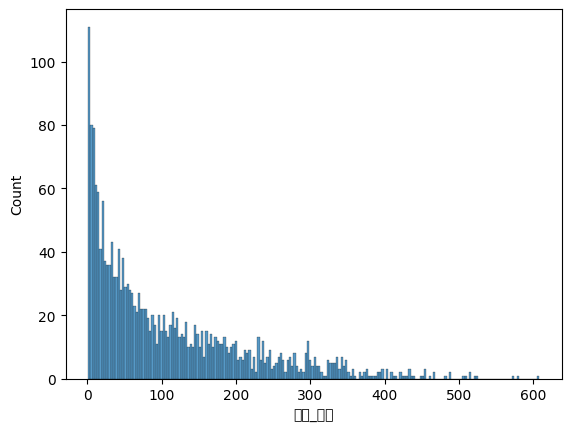

In [86]:
# 재구매 빈도 히스토그램
sns.histplot(data = tt[tt['날짜_차이']>=1], x = '날짜_차이', bins = 200)

In [93]:
# 1일 이상 재구매 건수
print(tt[tt['날짜_차이']>=1 ].count())

# 1일 이상 & 100일이내 재구매 건수
print(tt[(tt['날짜_차이']>=1) & (tt['날짜_차이']<=100)].count())

# 비율
print((tt[(tt['날짜_차이']>=1) & (tt['날짜_차이']<=100)].count() /tt[tt['날짜_차이']>=1 ].count() ) *100)

Customer_unique_id          1952
Order_purchase_timestamp    1952
좌석판매율_shift                 1952
날짜_차이                       1952
시간_차이                       1952
dtype: int64
Customer_unique_id          1175
Order_purchase_timestamp    1175
좌석판매율_shift                 1175
날짜_차이                       1175
시간_차이                       1175
dtype: int64
Customer_unique_id          60.194672
Order_purchase_timestamp    60.194672
좌석판매율_shift                 60.194672
날짜_차이                       60.194672
시간_차이                       60.194672
dtype: float64


### 동시구매 제외한 2번 이상 재구매한 고객의 수

In [108]:
get_2up = term[(term['날짜_차이']<900) & (term['시간_차이']>=1)]
get_2up

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Customer_unique_id,좌석판매율_shift,날짜_차이,시간_차이
83968,ORDER_84093,CUSTOMER_59129,delivered,2018-10-15 12:44:13,2018-10-17 20:05:34,2018-10-25 17:00:04,2018-11-08,CUSTOMER_Unique_00004,2018-09-14 18:14:31,30,44309.700000
37900,ORDER_37966,CUSTOMER_23788,delivered,2019-06-06 11:59:53,2019-06-06 17:28:00,2019-06-12 17:08:10,2019-07-13,CUSTOMER_Unique_00012,2019-03-07 15:57:14,90,130802.650000
5668,ORDER_05679,CUSTOMER_00030,delivered,2019-04-18 09:42:53,2019-04-20 18:52:39,2019-05-17 20:19:49,2019-05-18,CUSTOMER_Unique_00030,2019-03-05 18:12:15,43,62850.633333
70587,ORDER_70696,CUSTOMER_16448,delivered,2018-06-14 18:52:29,2018-06-22 08:11:38,2018-06-24 09:13:37,2018-07-07,CUSTOMER_Unique_00031,2018-06-14 18:31:54,0,20.583333
1219,ORDER_01221,CUSTOMER_10542,delivered,2019-06-11 16:49:47,2019-06-12 15:05:00,2019-06-13 18:39:37,2019-06-26,CUSTOMER_Unique_00078,2019-05-16 23:45:47,25,37024.000000
...,...,...,...,...,...,...,...,...,...,...,...
9156,ORDER_09171,CUSTOMER_84251,delivered,2019-04-26 18:07:40,2019-04-30 16:03:00,2019-05-02 16:42:34,2019-05-11,CUSTOMER_Unique_81626,2018-06-06 17:00:18,324,466627.366667
82889,ORDER_83012,CUSTOMER_87277,delivered,2019-04-29 22:59:41,2019-05-03 13:19:00,2019-05-04 20:28:42,2019-05-17,CUSTOMER_Unique_82027,2018-12-30 00:06:41,120,174173.000000
7434,ORDER_07447,CUSTOMER_85116,delivered,2019-01-19 08:02:06,2019-01-22 18:59:39,2019-02-02 15:42:37,2019-02-16,CUSTOMER_Unique_82450,2018-04-24 10:53:12,269,388628.900000
11423,ORDER_11441,CUSTOMER_85518,delivered,2018-12-03 20:37:09,2018-12-05 20:48:48,2018-12-13 20:09:37,2018-12-26,CUSTOMER_Unique_82832,2018-11-28 01:16:27,5,8360.700000


In [109]:
term['Customer_unique_id'].nunique()

2558

##  payments 테이블
- 전체 매출액구하기

In [19]:
payments

,Order_id,Payment_sequential,Payment_type,Payment_installments,Payment_value
0,ORDER_66617,1,credit_card,8,99.33
1,ORDER_86954,1,credit_card,1,24.39
2,ORDER_38852,1,credit_card,1,65.71
3,ORDER_57443,1,credit_card,8,107.78
4,ORDER_11244,1,credit_card,2,128.45
...,...,...,...,...,...
91966,ORDER_46197,1,credit_card,1,194.11
91967,ORDER_37509,1,credit_card,2,198.94
91968,ORDER_85760,1,boleto,1,363.31
91969,ORDER_35237,1,credit_card,2,96.80


In [21]:
# 결제건수
print(payments['Order_id'].nunique())

#주문건수
print(orders['Order_id'].nunique())

87954
87955


In [24]:
# 결제건이 없는 주문테이블 데이터
merge_df[~merge_df['Order_id'].isin(payments['Order_id'])]

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Customer_unique_id
27135,ORDER_27185,CUSTOMER_18731,delivered,2017-09-15 12:16:38,2017-11-07 17:11:53,2017-11-09 07:47:38,2017-10-04,CUSTOMER_Unique_18582


### 전체 매출 금액

In [25]:
 #전체 매출 건수
 payments['Payment_value'].sum()

14039359.970000003

In [31]:
# 주문수 2개 이상인 order_id, customer_id, Cumstomer_unique_id 모여있는 데이터 프레임
occ = merge_df[merge_df['Customer_id'].isin(temp['Customer_id'])]
occ

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Customer_unique_id
61584,ORDER_61678,CUSTOMER_00004,delivered,2018-09-14 18:14:31,2018-09-18 21:27:40,2018-09-28 17:32:43,2018-10-04,CUSTOMER_Unique_00004
17819,ORDER_17849,CUSTOMER_00007,delivered,2019-01-18 12:35:44,2019-01-18 23:25:35,2019-01-26 15:17:57,2019-02-20,CUSTOMER_Unique_00007
41922,ORDER_41993,CUSTOMER_00012,delivered,2019-03-07 15:57:14,2019-03-12 23:02:49,2019-03-15 00:46:30,2019-03-19,CUSTOMER_Unique_00012
5668,ORDER_05679,CUSTOMER_00030,delivered,2019-04-18 09:42:53,2019-04-20 18:52:39,2019-05-17 20:19:49,2019-05-18,CUSTOMER_Unique_00030
8500,ORDER_08514,CUSTOMER_00031,delivered,2018-06-14 18:31:54,2018-06-22 08:11:38,2018-07-07 20:32:47,2018-07-07,CUSTOMER_Unique_00031
...,...,...,...,...,...,...,...,...
4019,ORDER_04027,CUSTOMER_87980,delivered,2018-10-29 11:59:50,2018-10-31 18:42:00,2018-11-06 21:18:53,2018-11-24,CUSTOMER_Unique_64038
51675,ORDER_51757,CUSTOMER_87983,delivered,2018-12-13 17:35:26,2018-12-19 20:33:02,2019-01-05 22:24:41,2019-01-22,CUSTOMER_Unique_34221
15797,ORDER_15824,CUSTOMER_87991,delivered,2019-06-20 14:16:20,2019-06-20 15:02:00,2019-06-27 13:18:47,2019-07-18,CUSTOMER_Unique_41518
29531,ORDER_29583,CUSTOMER_88006,delivered,2019-05-15 10:39:41,2019-05-15 15:55:00,2019-05-22 19:42:12,2019-06-12,CUSTOMER_Unique_06280


### 충성고객 매출

In [41]:
# 2번이상 구매한 고객들의 결제 내역 5722건
print(payments[payments['Order_id'].isin(occ['Order_id'])]['Payment_value'].sum())

# 전체 대비 충성고객 매출 비율
print((payments[payments['Order_id'].isin(occ['Order_id'])]['Payment_value'].sum() /  payments['Payment_value'].sum())* 100)

785985.77
5.598444456724047


In [ ]:
print(payments[payments['Order_id'].isin(get_2['Order_id'])]['Payment_value'].sum())
